# Einsums

> ### For an introuduction on einsums and their use on machine learning, see [this post](https://grrddm.notion.site/Einsums-in-the-wild-bd773f01ba4c463ca9e4c1b5a6d90f5f).

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.random import seed, randint
from numpy.linalg import inv

In [2]:
%config InlineBackend.figure_format = "retina"

http://ajcr.net/Basic-guide-to-einsum/

In [3]:
seed(1643)
A = randint(0, 10, 4).reshape(2, 2)
A

array([[5, 9],
       [6, 2]])

$\sum_{i} A_{i,i}$

In [4]:
# Sum over the diagonal (the trace)
np.einsum("ii->", A)

7

In [5]:
# Sum all of the elements of A
np.einsum("ij->", A)

22

In [6]:
# ∀ col, sum over rows
np.einsum("ij->j", A)

array([11, 11])

In [7]:
# ∀ row, sum over columns
np.einsum("ij->i", A)

array([14,  8])

In [8]:
# Transpose a matrix
np.einsum("ij->ji", A)

array([[5, 6],
       [9, 2]])

$\sum_{i} a_i  b_i$

In [9]:
a, b = np.array([1,2,3]), np.array([1, 1, 1])

In [10]:
# Dot product
np.einsum("i,i->", a, b)

6

In [11]:
# Sum over 'b' and multiply by each entry of i
np.einsum("i,j->i", a,b)

array([3, 6, 9])

In [12]:
# The outer-product of 'a'
np.einsum("i,j->ij", a, a)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

## Matrix Multiplication

Consider the matrix $E= ABCD$

$$
    E_{ij} = \sum_{k}\sum_{l}\sum_{m} A_{ik}B_{kl}C_{lm}D_{mj}
$$

$(AB)_{i,k} = A_{i,:}\cdot B_{:,k} = \sum_{j=1}^n A_{i,j} B_{j, k}$

In [13]:
A = np.array([[1, 1, 1],
              [2, 2, 2],
              [5, 5, 5]])

B = np.array([[0, 1, 0],
              [1, 1, 0],
              [1, 1, 1]])

In [14]:
# Since the resulting term does not contain 'j', we are implicity stating that
# we should sum over indices j
np.einsum("ij,jk -> ik", A, B)

array([[ 2,  3,  1],
       [ 4,  6,  2],
       [10, 15,  5]])

## The Squared Mahalanobis Distance

The Mahalanobis distance of a vector $\bf x$ with covariance matrix $\bf S$ is defined as

$$
D_M({\bf x}) = \left({\bf x}^T{\bf S}^{-1}{\bf x}\right)^{1/2}
$$

In [15]:
seed(1643)
x = np.random.randint(-10, 10, 3)
S = np.random.randn(3)
S = np.exp(-1 / 2 * (S[:, np.newaxis] - S[np.newaxis, :])**2)
np.linalg.eigvals(S) # Not a singular matrix / positive semidefinite

array([1.89039944, 0.16621811, 0.94338245])

In [16]:
x.T @ S

array([-5.81794629, -7.32889192,  6.15102389])

In [17]:
np.einsum("i,ik->k", x, S)

array([-5.81794629, -7.32889192,  6.15102389])

In [18]:
x.T @ inv(S) @ x

132.46814131578864

In [19]:
np.einsum("i,ik,k->", x, inv(S), x)

132.4681413157886

## In Higher Dimensions
Given the following 5x3 matrix of integers, suppose we want to compute the outer-product of each column.
The resulting array should be of shape `(3, 5, 5)`

In [20]:
seed(314)
Phi = np.random.randint(0, 10, (5, 3))
Phi

array([[8, 9, 3],
       [6, 0, 7],
       [2, 8, 6],
       [7, 0, 3],
       [6, 7, 8]])

#### For a single column

In matrix notation, the outer-product of a vector is given by the product $aa^T$

In [21]:
Phi[:, [0]] @ Phi[:, [0]].T

array([[64, 48, 16, 56, 48],
       [48, 36, 12, 42, 36],
       [16, 12,  4, 14, 12],
       [56, 42, 14, 49, 42],
       [48, 36, 12, 42, 36]])

Under `einsum`, we can express the outer-product of any two unidimensional arrays $a$, $b$ by specifying the indices of $a$ and $b$.

In [22]:
vPhi_i = Phi[:, 0]
np.einsum("i,j->ij", vPhi_i, vPhi_i)

array([[64, 48, 16, 56, 48],
       [48, 36, 12, 42, 36],
       [16, 12,  4, 14, 12],
       [56, 42, 14, 49, 42],
       [48, 36, 12, 42, 36]])

In [23]:
vPhi_i = Phi[:, [0]]
np.einsum("ik,jk->kij", vPhi_i, vPhi_i)

array([[[64, 48, 16, 56, 48],
        [48, 36, 12, 42, 36],
        [16, 12,  4, 14, 12],
        [56, 42, 14, 49, 42],
        [48, 36, 12, 42, 36]]])

#### For every column

In [24]:
# For every column 'k', compute the matrix resulting
# in evaluating every pair of value multiplication
# (i,j)
np.einsum("ik,jk->kij", Phi, Phi)

array([[[64, 48, 16, 56, 48],
        [48, 36, 12, 42, 36],
        [16, 12,  4, 14, 12],
        [56, 42, 14, 49, 42],
        [48, 36, 12, 42, 36]],

       [[81,  0, 72,  0, 63],
        [ 0,  0,  0,  0,  0],
        [72,  0, 64,  0, 56],
        [ 0,  0,  0,  0,  0],
        [63,  0, 56,  0, 49]],

       [[ 9, 21, 18,  9, 24],
        [21, 49, 42, 21, 56],
        [18, 42, 36, 18, 48],
        [ 9, 21, 18,  9, 24],
        [24, 56, 48, 24, 64]]])

### The Mahalanobis distance in a multidimensional array

We are interested in computing the squared Mahalanobis distance between a set of vectors $\bf X$ and a covariance matrix $\bf S$.

In [25]:
seed(1643)
x = np.random.randint(-10, 10, (2, 3))
S = np.random.randn(3)
S = np.exp(-1 / 2 * (S[:, np.newaxis] - S[np.newaxis, :])**2)

Recall, for a unidemensional array, the Mahalanobis distance under an einsum is given by `i,ik,k->`

In [26]:
# We fix the row and sum over the columns
np.einsum("ji,ik->jk", x, S)

array([[-5.81794629, -7.32889192,  6.15102389],
       [ 2.37852468,  1.74367502, -5.94610877]])

In [27]:
# 'j' represents each of the rows of x.
#    ji,ik represents the inner product of each row with S.
#    The resulting vector can be multiplied by each row of x
#    and the result should be the number of rows
np.einsum("ji,ik,jk->j", x, inv(S), x)

array([132.46814132, 640.35662576])

**The Mahalanobis distance for a collection of vectors under a multidimensional array**  

Suppose we want to compute the Mahalanobis distance for a collection of arrays and covariance matrices. In this example, we have our target array ${\bf x} \in \mathbb{R}^{2\times3}$ and a multidimensional array ${\bf S} \in \mathbb{R}^{2\times 3\times 3}$. What we want is to find an einsum expression that returns a vector with two entries.

In [28]:
seed(1643)
x = np.random.randint(-10, 10, (2, 3)) * 1. # cast to float64

S1 = np.random.randn(3)
S1 = np.exp(-1 / 2 * (S1[:, np.newaxis] - S1[np.newaxis, :])**2)

S2 = np.random.randn(3)
S2 = np.exp(-1 / 2 * (S2[:, np.newaxis] - S2[np.newaxis, :])**2)

S = np.stack((S1, S2))
S.shape

(2, 3, 3)

In [29]:
np.einsum("i,ik,k->", x[0], inv(S1), x[0])

132.4681413157886

In [30]:
np.einsum("i,ik,k->", x[1], inv(S2), x[1])

2332.058020928929

In [31]:
np.einsum("ji,jik,jk->j", x, inv(S), x)

array([ 132.46814132, 2332.05802093])

## Speedtest

(See chapter 12: probabilistic PCA for context)

In [34]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist.load_data()
(Xtrain, ytrain), (Xtest, ytest) = mnist

In [35]:
N, D, D = Xtrain.shape
X = Xtrain.reshape(N, -1)
N, D = X.shape

Xhat = X - X.mean(axis=0)

M = 2
W = np.random.randn(D, M)
sigma2 = 0.5

In [36]:
# Helper posterior distribution matrix
Mz = W.T @ W + sigma2 * np.identity(M)

In [37]:
from time import time
def time_product(M, W, X, N=None):
    init = time()
    E_zn = M @ W.T @ X[:N, :].T
    end = time()
    return end - init

def time_einsum(M, W, X, N=None):
    init = time()
    E_zn = np.einsum("ij,mj,km->ik", M, W, X[:N, :], optimize=True)
    end = time()
    return end - init

def sample_times(f, M, W, X, step=100):
    N, D = X.shape
    list_seconds = []
    n_samples = np.arange(2, N, step)
    for nsamp in n_samples:
        print(nsamp, end="\r")
        nsecs = f(M, W, X, nsamp)
        list_seconds.append(nsecs)
    return list_seconds

In [38]:
%%time
einsum_seconds = sample_times(time_einsum, inv(Mz), W, X)

CPU times: user 3min 41s, sys: 31.9 s, total: 4min 13s
Wall time: 1min 3s


In [39]:
%%time
product_seconds = sample_times(time_product, inv(Mz), W, X)

CPU times: user 5min 58s, sys: 38.8 s, total: 6min 37s
Wall time: 2min 5s


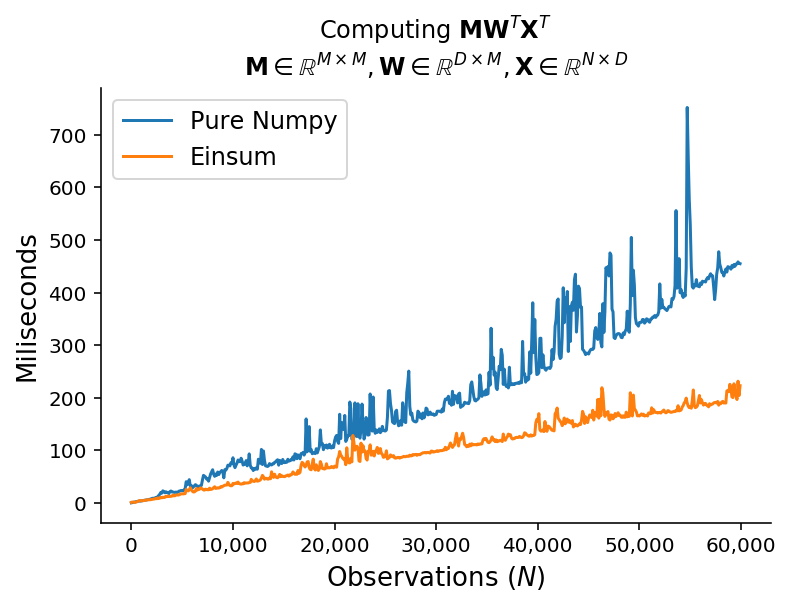

In [62]:
fig, ax = plt.subplots()
n_samples = np.arange(2, N, 100)
plt.plot(n_samples, 1e3 * np.array(product_seconds), label="Pure Numpy")
plt.plot(n_samples, 1e3 * np.array(einsum_seconds), label="Einsum")
plt.legend(fontsize=12)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel("Miliseconds", fontsize=13)
plt.xlabel(r"Observations ($N$)", fontsize=13)

ticks = np.arange(0, N+1, 10000)
labs = [format(tick, ",") for tick in ticks]
plt.xticks(ticks, labs)

title = (r"Computing ${\bf M}{\bf W}^T{\bf X}^T$" "\n"
         r"${\bf M}\in\mathbb{R}^{M\times M}, {\bf W}\in\mathbb{R}^{D\times M},"
         r"{\bf X}\in\mathbb{R}^{N\times D}$")
plt.title(title);